<a href="https://colab.research.google.com/github/Tanushka22/Clustering-based-Image-Segmentation-Techniques/blob/main/Clustering_based_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the essential libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os
from skimage import io
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from skimage import data, segmentation, color
from skimage.future import *
from skimage.color import rgb2gray
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import skimage.future

In [ ]:
def display_image(image):
  """
  params:
  image: Any input image.
  TO DO:
  plot the image
  """
  plt.axis('off')
  io.imshow(image);

In [ ]:
def display_segmented_image(input_image, resultant_image,clustering_method_and_image_type):
  """
  params:
  input_image: to display the original image.
  resultant_image: input_image after performing some operation.
  image_file_name: name of the final image that is to be saved.
  clustering method: clustering method used.
  TO DO:
  Display and save input image and resultant image.
  """
  rows = 1
  columns = 2
  fig = plt.figure(figsize=(8, 5))
  fig.add_subplot(rows, columns, 1)
  plt.axis('off')
  io.imshow(input_image);
  fig.add_subplot(rows, columns, 2)
  plt.axis('off')
  io.imshow(resultant_image);
  plt.title(f'{clustering_method_and_image_type}.jpg')

In [ ]:
def colors_from_centers(centers):
  colors = []
  for each_color in centers:
    colors.append(each_color)
  return colors

In [ ]:
def perform_kmeans(flat_image, num_clusters):
  """
  params:
  Input: fallted image
  num_clusters: number of cluster
  TO DO:
  Perform kmeans clustering.
  return:
  centers and labels
  """
  km = KMeans(n_clusters = num_clusters)
  km.fit(flat_image)
  centers = km.cluster_centers_
  labels = km.labels_
  return centers, labels

In [ ]:
def perform_segmentation(input_image, colors, labels):
  segmented_image = np.zeros((input_image.shape[0] * input_image.shape[1],input_image.shape[2]),dtype='uint8')
  for i in range(segmented_image.shape[0]):
    segmented_image[i] = colors[labels[i]]

  segmented_image = segmented_image.reshape((input_image.shape))
  return segmented_image

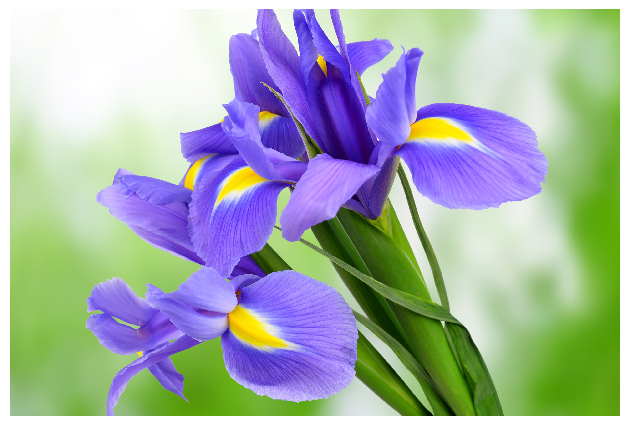

In [ ]:
flower1 = io.imread('flower1.jpg')
display_image(flower1)

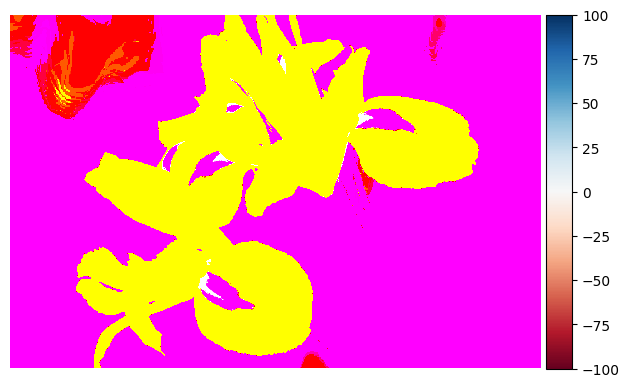

In [ ]:
flower1_lab = color.rgb2lab(flower1)
display_image(flower1_lab)

In [ ]:
def kmeans_segmentation(image):
  flat_image = image.reshape((-1,3))
  #############################################################
  # For K-means clustering, use K = 5.
  #############################################################
  kmeans_centers, kmeans_labels = perform_kmeans(flat_image, 5)
  kmeans_colors = colors_from_centers(kmeans_centers)
  kmeans_segmented_image = perform_segmentation(image, kmeans_colors,kmeans_labels)
  return kmeans_segmented_image

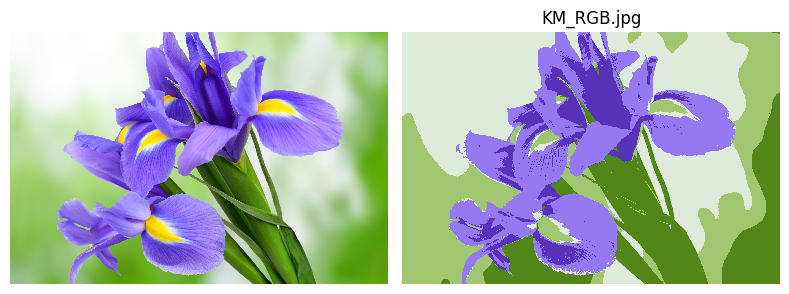

In [ ]:
kmeans_segmented_rgb_image = kmeans_segmentation(flower1)
display_segmented_image(flower1, kmeans_segmented_rgb_image, 'KM_RGB')

In [ ]:
def perform_mean_shift(flat_image):
  flat_image = np.float32(flat_image)
  bandwidth = estimate_bandwidth(flat_image, quantile=.06, n_samples=3000)
  mean_shift = MeanShift(bandwidth = bandwidth, max_iter=50, bin_seeding=True)
  mean_shift.fit(flat_image)
  centers = mean_shift.cluster_centers_
  labels = mean_shift.labels_
  return centers, labels

In [ ]:
def mean_shift_segmentation(image):
  flat_image = image.reshape((-1,3))
  mean_shift_centers, mean_shift_labels = perform_mean_shift(flat_image)
  mean_shift_colors = colors_from_centers(mean_shift_centers)
  mean_shift_segmented_image = perform_segmentation(image, mean_shift_colors,mean_shift_labels)
  return mean_shift_segmented_image

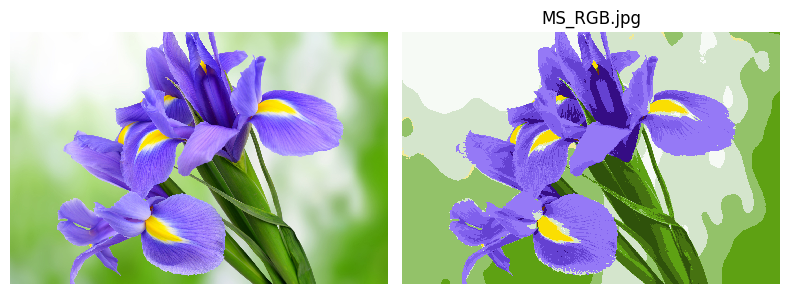

In [ ]:
mean_shift_segmented_rgb_image = mean_shift_segmentation(flower1)
display_segmented_image(flower1, mean_shift_segmented_rgb_image, 'MS_RGB')

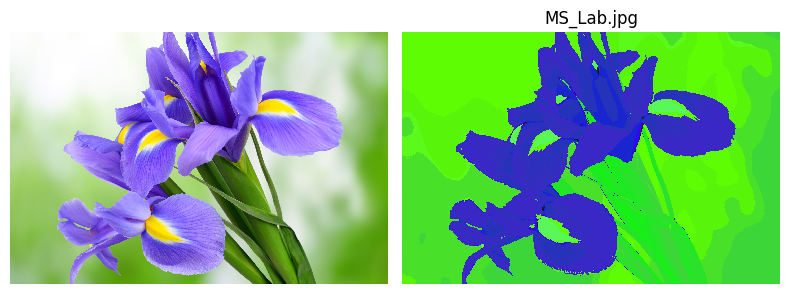

In [ ]:
mean_shift_segmented_lab_image = mean_shift_segmentation(flower1_lab)
display_segmented_image(flower1, mean_shift_segmented_lab_image, 'MS_Lab')

In [ ]:
def normalized_cut(image, convert_2_lab):
  labels = segmentation.slic(image, compactness=30, n_segments=100,start_label=1, convert2lab = convert_2_lab)
  g = skimage.graph.rag_mean_color(image, labels, mode='similarity')
  labels2 = skimage.graph.cut_normalized(labels, g)
  normalized_cut_image = color.label2rgb(labels2, image, kind='avg', bg_label=0)
  return normalized_cut_image.astype(np.uint8)

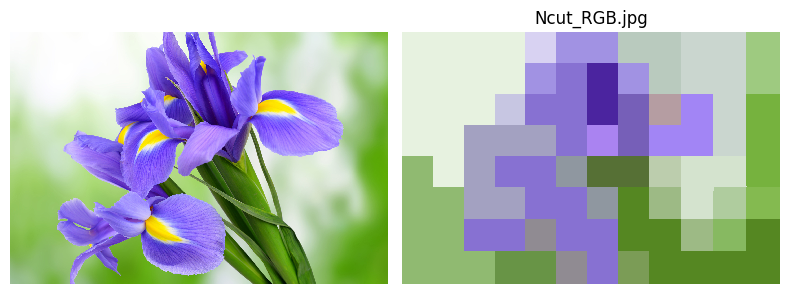

In [ ]:
normalized_cut_rgb_image = normalized_cut(flower1, False)
display_segmented_image(flower1, normalized_cut_rgb_image, 'Ncut_RGB')

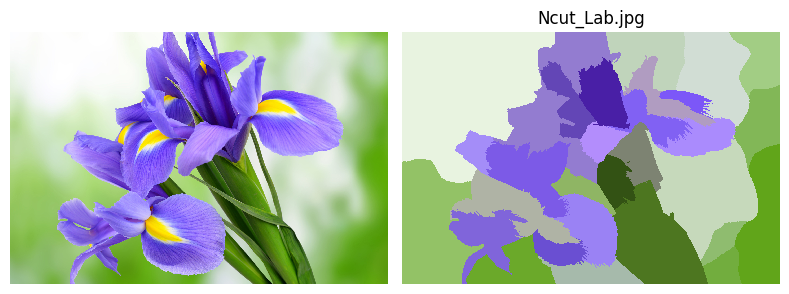

In [ ]:
# Segmentation using Ncut
normalized_cut_lab_image = normalized_cut(flower1, True)
display_segmented_image(flower1, normalized_cut_lab_image, 'Ncut_Lab')